In [1]:
# IMPORT DATA :

import pandas as pd
from sklearn.model_selection import train_test_split


df =pd.read_csv("C:/Users/Michel/Documents/Github/IntroML/HousingData/HousingData_post_treatment.csv")

df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.303130,0.693333


In [2]:
# Prepare Data :

x = df.drop('MEDV', axis=1)
y = df['MEDV']
 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [5]:
from sklearn.neural_network import MLPRegressor

#Modèle utilisant un réseau de neurones

def skl_nn_model(X,Y,q):
    
    #on utilise cette activation et ce solver par défaut
    regr = MLPRegressor(hidden_layer_sizes=(q),activation='relu', solver='lbfgs').fit(X, Y)
    return regr

model=skl_nn_model(X_train,y_train,10) #création du modèle

y_pred = model.predict(X_test)


c:\Users\Michel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


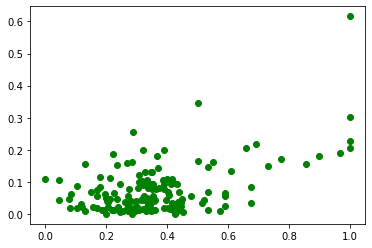

In [6]:
# Graph :
from matplotlib import pyplot as plt 

plt.scatter(y_test, abs(y_pred - y_test) ,color='g') 

plt.show()

In [7]:
# RMSE :

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.011933965976123355

c:\Users\Michel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Michel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Michel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

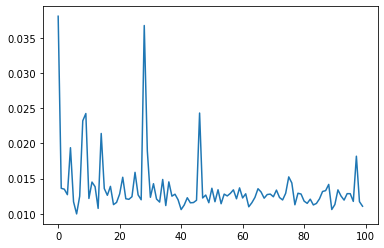

In [11]:
MSE=[]

for q in range(100):
    model=skl_nn_model(X_train,y_train,q+1) #création du modèle
    y_pred = model.predict(X_test)
    MSE.append(mean_squared_error(y_test, y_pred))

plt.plot(MSE)
    